# DL4ES2

Свойства распределения активаций полносвязной сети при условии использования функции активации ReLU

In [25]:
import torch
import torch.nn as nn
import numpy as np

In [26]:
import matplotlib.pyplot as plt

Инициализация согласно статье [Xavier Glorot & Yoshua Bengio, 2010](https://proceedings.mlr.press/v9/glorot10a.html)

In [27]:
def init_xavier_normal(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal(m.weight)
        m.bias.data.fill_(0.01)

Инициализация согласно статье [Kaiming He, 2015](https://arxiv.org/abs/1502.01852v1)

In [28]:
def init_kaiming_normal(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        m.bias.data.fill_(0.01)

In [29]:
class NN_relu(nn.Module):
    def __init__(self, in_features = 1, *args, **kwargs):
        super(NN_relu, self).__init__(*args, **kwargs)        
        self.l1 = nn.Sequential(nn.Linear(in_features, 128), nn.ReLU())
        self.l2 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.l3 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.l4 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.l5 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.l6 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.l7 = nn.Sequential(nn.Linear(128, 128), nn.ReLU())
        self.lout = nn.Sequential(nn.Linear(128, 1), nn.ReLU())
        
    def forward(self, x):
#         out = self.operations(x)
        
        l1out = self.l1(x)
        l2out = self.l2(l1out)
        l3out = self.l3(l2out)
        l4out = self.l4(l3out)
        l5out = self.l5(l4out)
        l6out = self.l6(l5out)
        l7out = self.l7(l6out)
        out = self.lout(l7out)
        return l1out, l2out, l3out, l4out, l5out, l6out, l7out, out

In [31]:
net_xavier = NN_relu(in_features=128)
net_xavier.apply(init_xavier_normal);

/var/folders/zg/qw7fghs57x1bj90_km31rvpm0000gn/T/ipykernel_65010/2943306806.py:3: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(m.weight)


In [32]:
net_xavier

NN_relu(
  (l1): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l2): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l3): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l4): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l5): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l6): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (l7): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
  (lout): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
    (1): ReLU()
  )
)

In [33]:
net_he = NN_relu(in_features=128)
net_he.apply(init_kaiming_normal);

In [34]:
x = np.random.randn(100, 128) * 3

In [35]:
l1out_xav, l2out_xav, l3out_xav, l4out_xav, l5out_xav, l6out_xav, l7out_xav, out_xav = net_xavier(torch.Tensor(x))
l1out_he, l2out_he, l3out_he, l4out_he, l5out_he, l6out_he, l7out_he, out_he = net_he(torch.Tensor(x))

In [36]:
type(l1out_he)

torch.Tensor

In [37]:
l1out_he

tensor([[0.0000, 7.8484, 0.0000,  ..., 2.1354, 2.1861, 8.4029],
        [0.0000, 0.5766, 3.1425,  ..., 1.8754, 0.0000, 1.7597],
        [3.4820, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [4.2874, 0.0000, 2.5369,  ..., 4.1646, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.3958,  ..., 0.0000, 0.1428, 0.0000],
        [2.3213, 0.0000, 4.7157,  ..., 0.1570, 8.1766, 0.0000]],
       grad_fn=<ReluBackward0>)

In [41]:
l1out_xav = l1out_xav.detach().numpy()
l2out_xav = l2out_xav.detach().numpy()
l3out_xav = l3out_xav.detach().numpy()
l4out_xav = l4out_xav.detach().numpy()
l5out_xav = l5out_xav.detach().numpy()
l6out_xav = l6out_xav.detach().numpy()
l7out_xav = l7out_xav.detach().numpy()
out_xav = out_xav.detach().numpy()

In [42]:
l1out_he = l1out_he.detach().numpy()
l2out_he = l2out_he.detach().numpy()
l3out_he = l3out_he.detach().numpy()
l4out_he = l4out_he.detach().numpy()
l5out_he = l5out_he.detach().numpy()
l6out_he = l6out_he.detach().numpy()
l7out_he = l7out_he.detach().numpy()
out_he = out_he.detach().numpy()

In [43]:
arrays_xav = [x, l1out_xav, l2out_xav, l3out_xav, l4out_xav, l5out_xav, l6out_xav, l7out_xav]
arrays_he = [x, l1out_he, l2out_he, l3out_he, l4out_he, l5out_he, l6out_he, l7out_he]

In [44]:
arrays_xav_vars = [np.square(np.std(a)) for a in arrays_xav]
arrays_he_vars = [np.square(np.std(a)) for a in arrays_he]

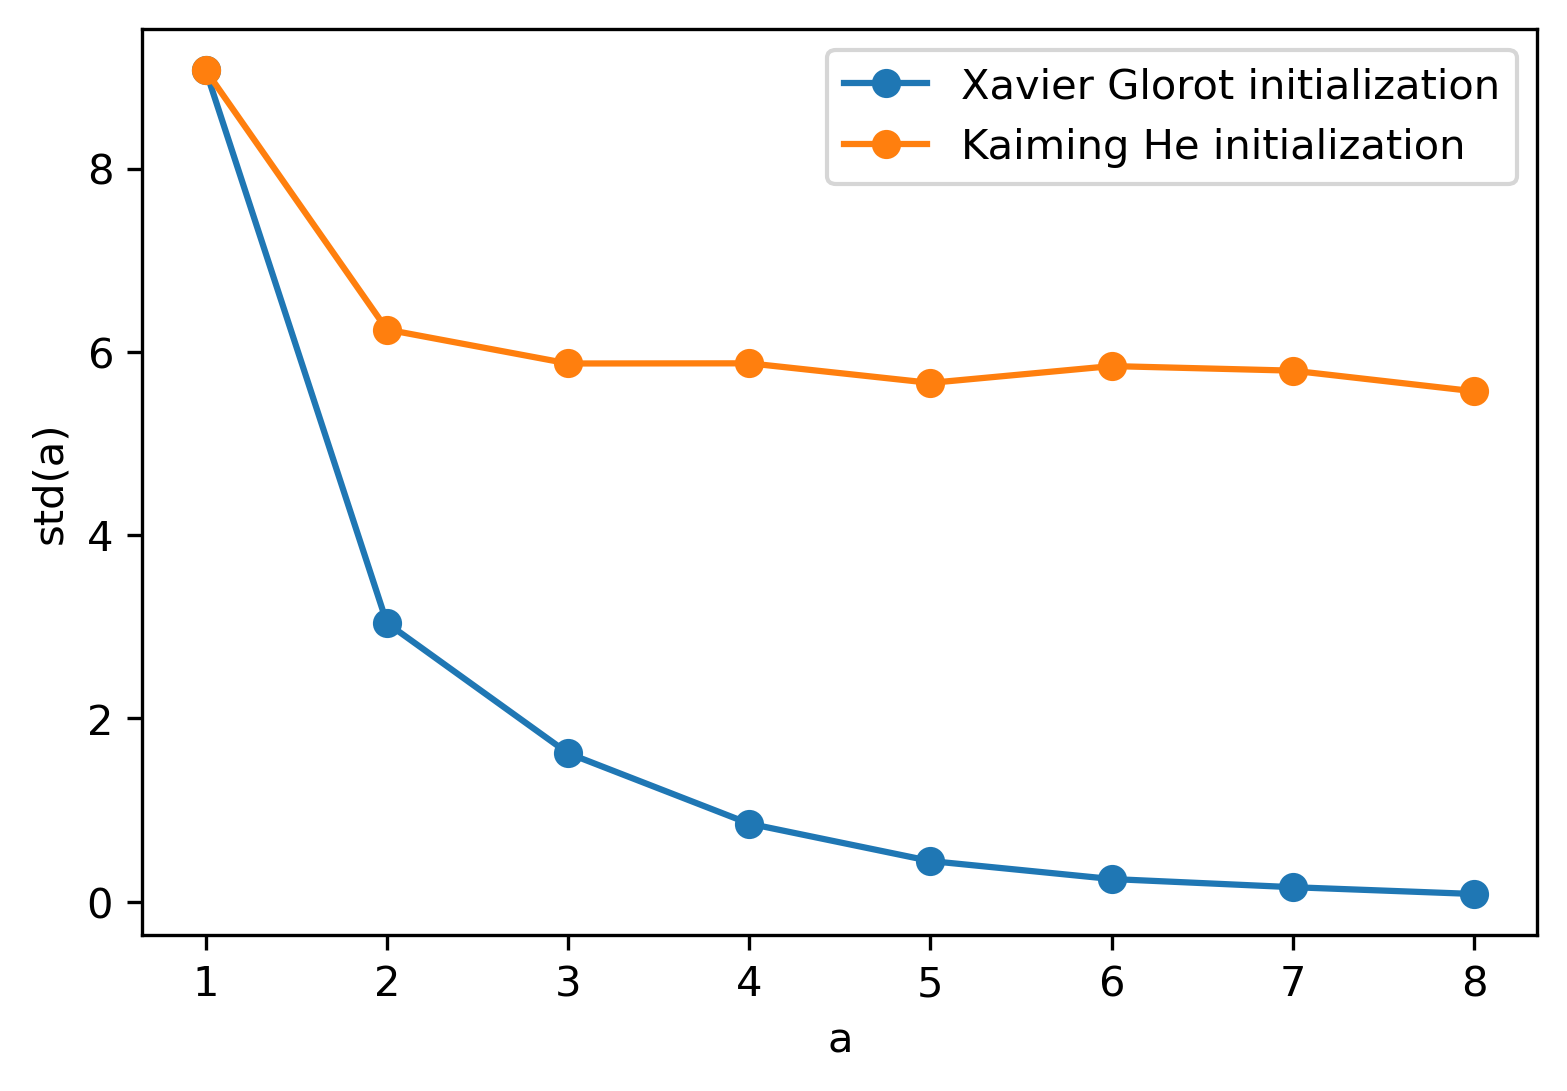

In [45]:
f = plt.figure(figsize=(6,4), dpi=300)
plt.plot(np.arange(len(arrays_xav_vars))+1, arrays_xav_vars, '-o', label='Xavier Glorot initialization')

plt.plot(np.arange(len(arrays_he_vars))+1, arrays_he_vars, '-o', label='Kaiming He initialization')

plt.ylabel('std(a)')
plt.xlabel('a')
plt.legend();

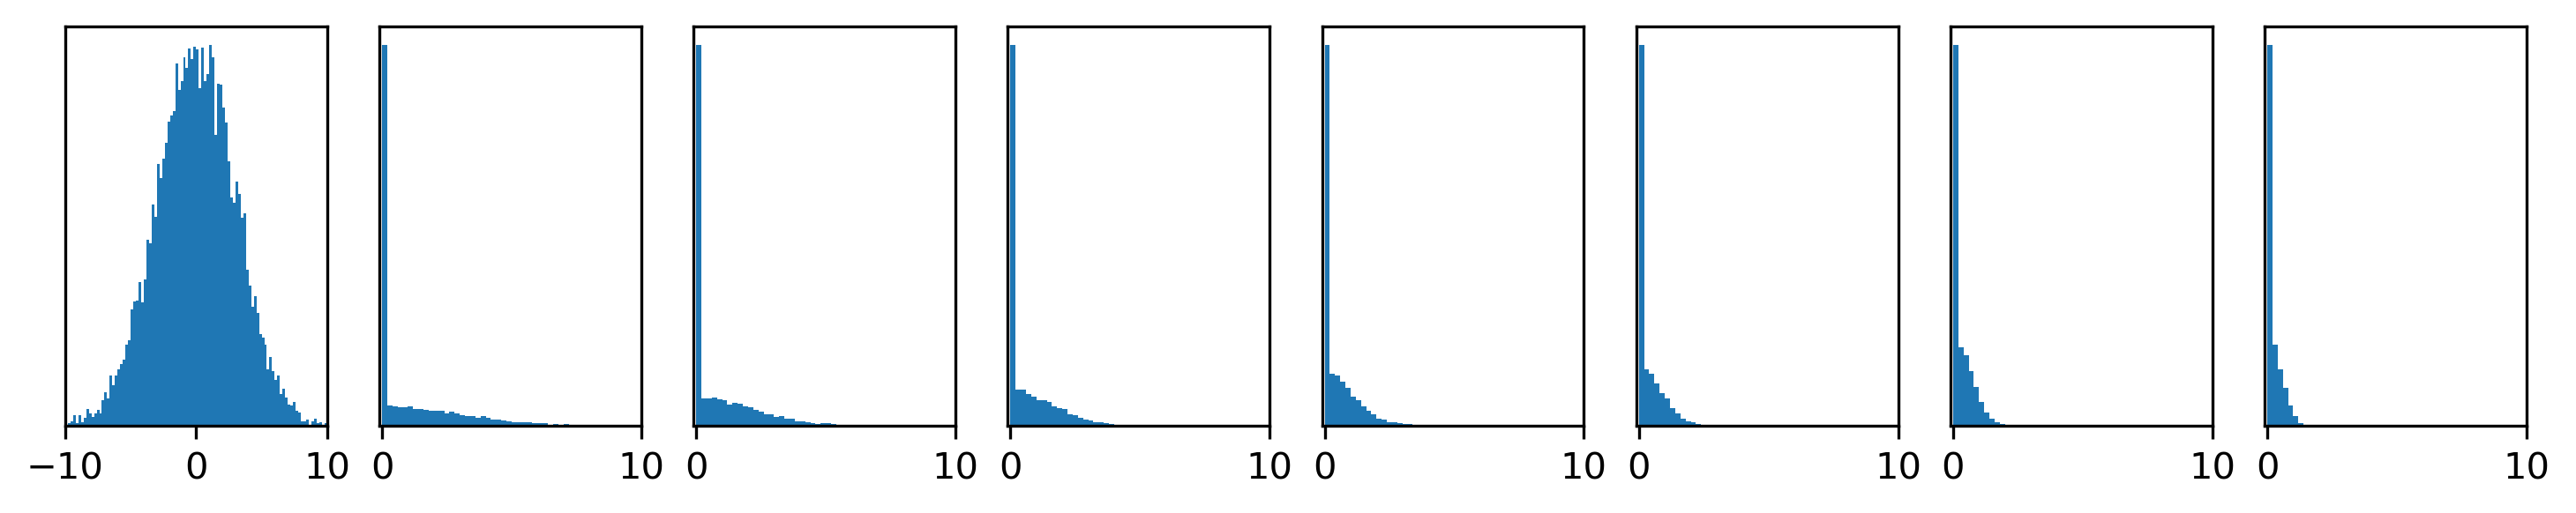

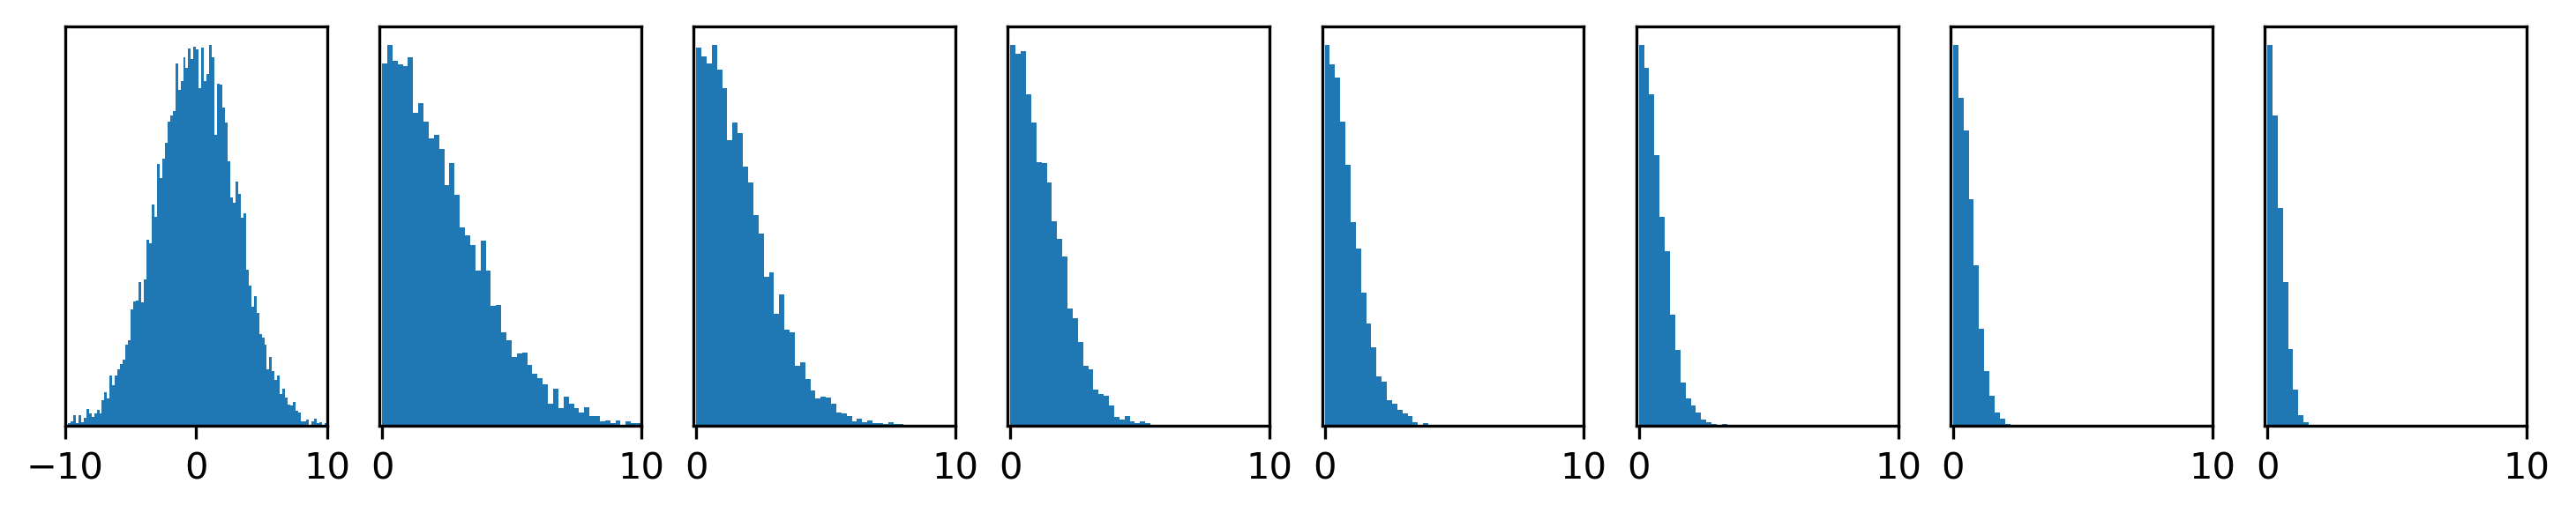

In [49]:
f = plt.figure(figsize=(12,2), dpi=300)

for idx,a in enumerate(arrays_xav):
    plt.subplot(1, len(arrays_xav), idx+1)
    
    if idx==0:
        plt.hist(a.ravel(), bins=np.linspace(-10.0, 10.0, 101))
        plt.xlim(-10.0, 10.0)
    else:
        h = a.ravel()
        plt.hist(h, bins=np.linspace(0, 10.0, 51))
        plt.xlim(-0.1, 10.0)
    plt.yticks([])
    
    

f = plt.figure(figsize=(12,2), dpi=300)

for idx,a in enumerate(arrays_xav):
    plt.subplot(1, len(arrays_xav), idx+1)
    
    if idx==0:
        plt.hist(a.ravel(), bins=np.linspace(-10.0, 10.0, 101))
        plt.xlim(-10.0, 10.0)
    else:
        h = a.ravel()
        h = h[h>0.0]
        plt.hist(h, bins=np.linspace(0, 10.0, 51))
        plt.xlim(-0.1, 10.0)
    plt.yticks([])

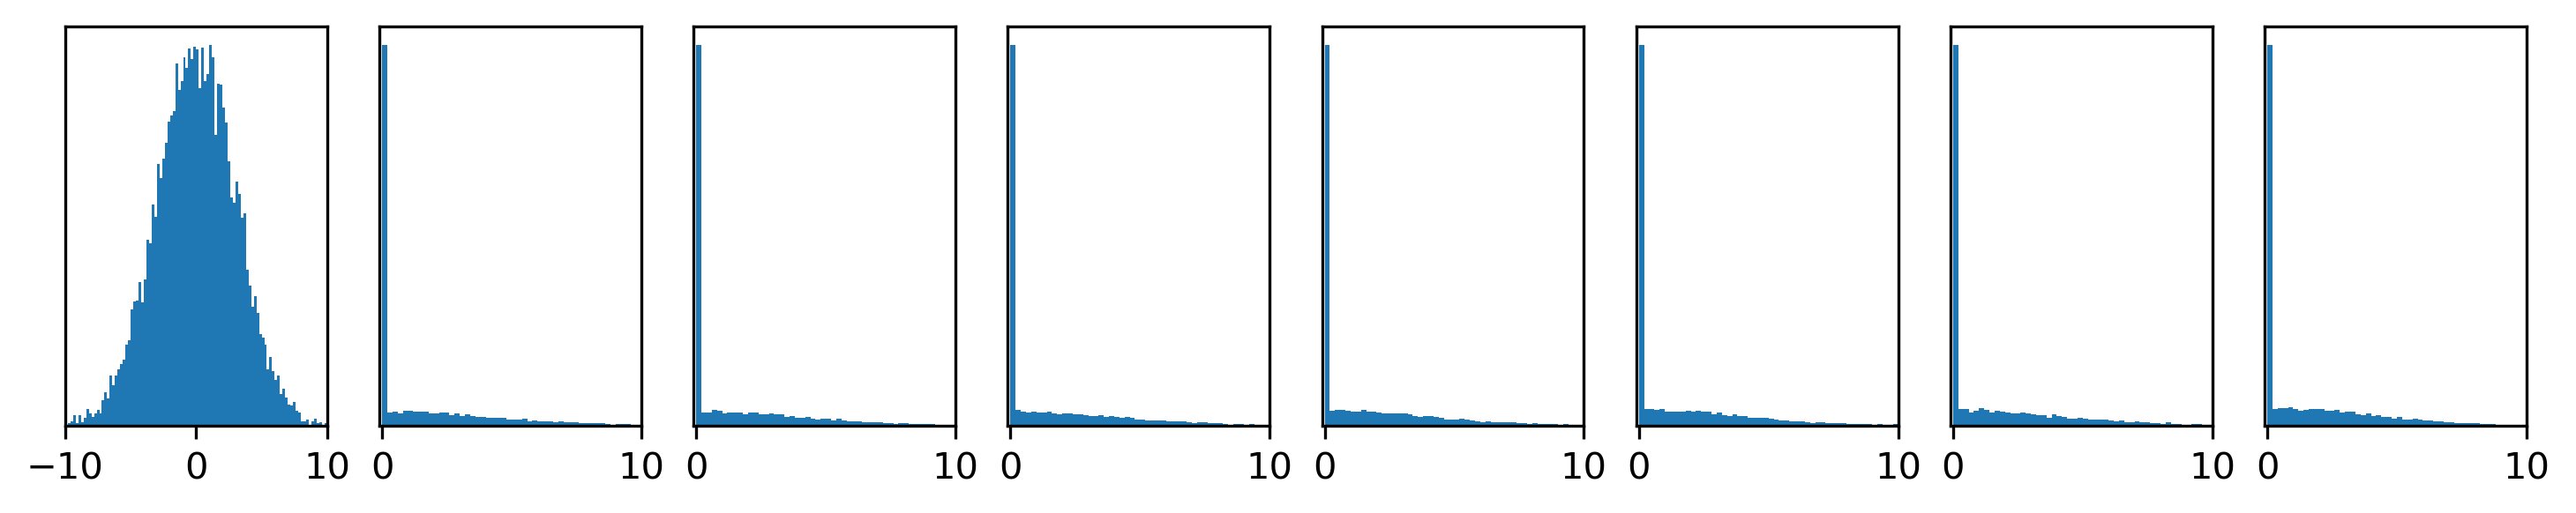

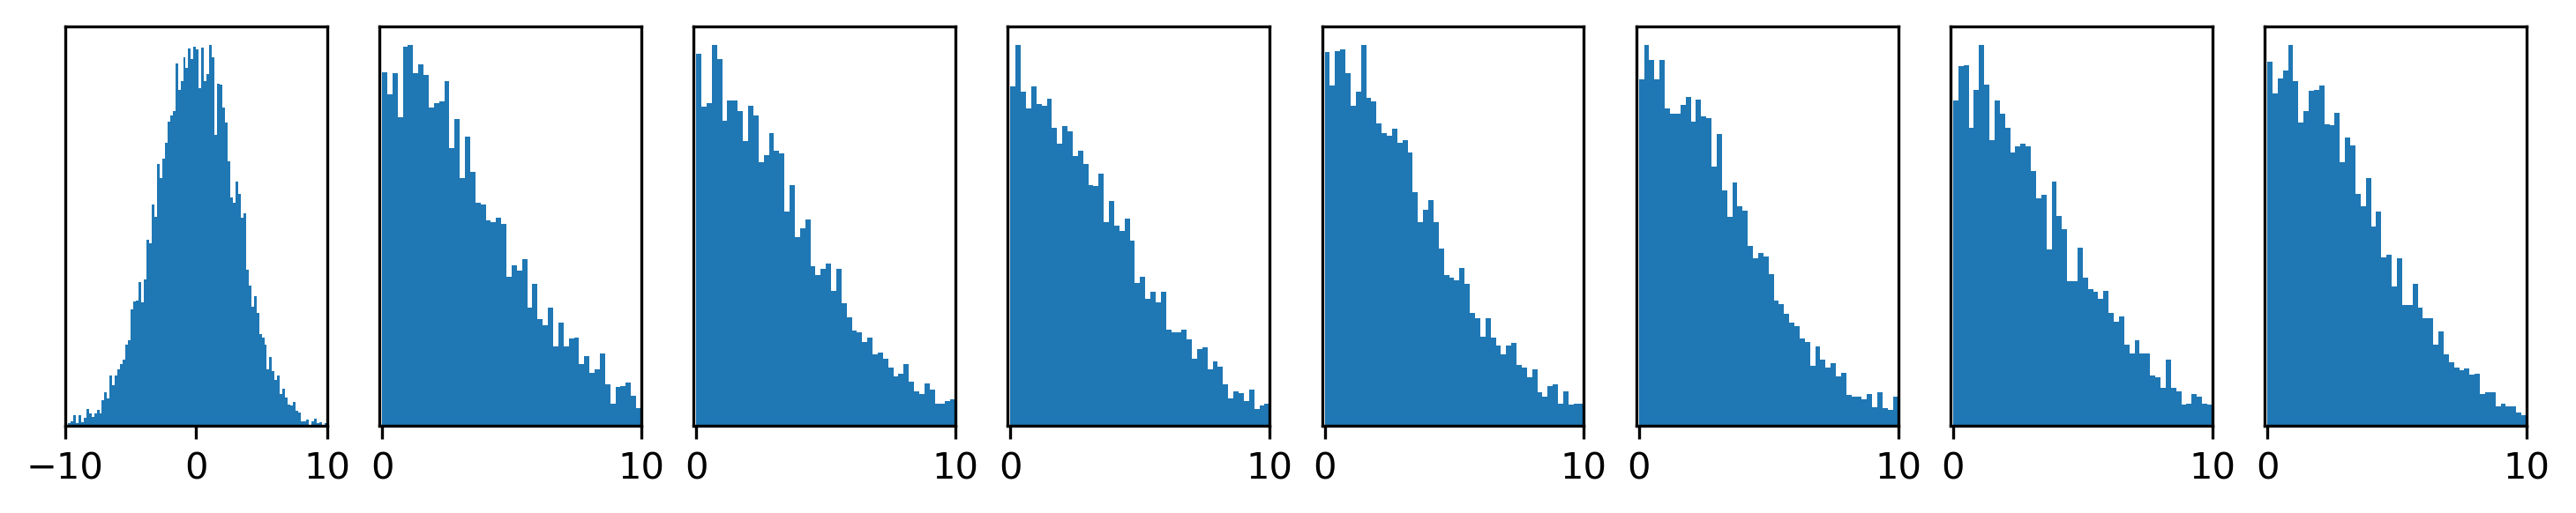

In [48]:
f = plt.figure(figsize=(12,2), dpi=300)

for idx,a in enumerate(arrays_he):
    plt.subplot(1, len(arrays_he), idx+1)
    
    if idx==0:
        plt.hist(a.ravel(), bins=np.linspace(-10.0, 10.0, 101))
        plt.xlim(-10.0, 10.0)
    else:
        h = a.ravel()
        plt.hist(h, bins=np.linspace(0, 10.0, 51))
        plt.xlim(-0.1, 10.0)
    plt.yticks([])
plt.show()

f = plt.figure(figsize=(12,2), dpi=300)

for idx,a in enumerate(arrays_he):
    plt.subplot(1, len(arrays_he), idx+1)
    
    if idx==0:
        plt.hist(a.ravel(), bins=np.linspace(-10.0, 10.0, 101))
        plt.xlim(-10.0, 10.0)
    else:
        h = a.ravel()
        h = h[h>0.0]
        plt.hist(h, bins=np.linspace(0, 10.0, 51))
        plt.xlim(-0.1, 10.0)
    plt.yticks([])
plt.show()